In [1]:
import pandas as pd

df = pd.read_csv("C:\\Users\ABHIS\Downloads\Train_Data.csv")
dfl=pd.read_csv("C:\\Users\ABHIS\Downloads\Traindata_classlabels.csv")

df.head

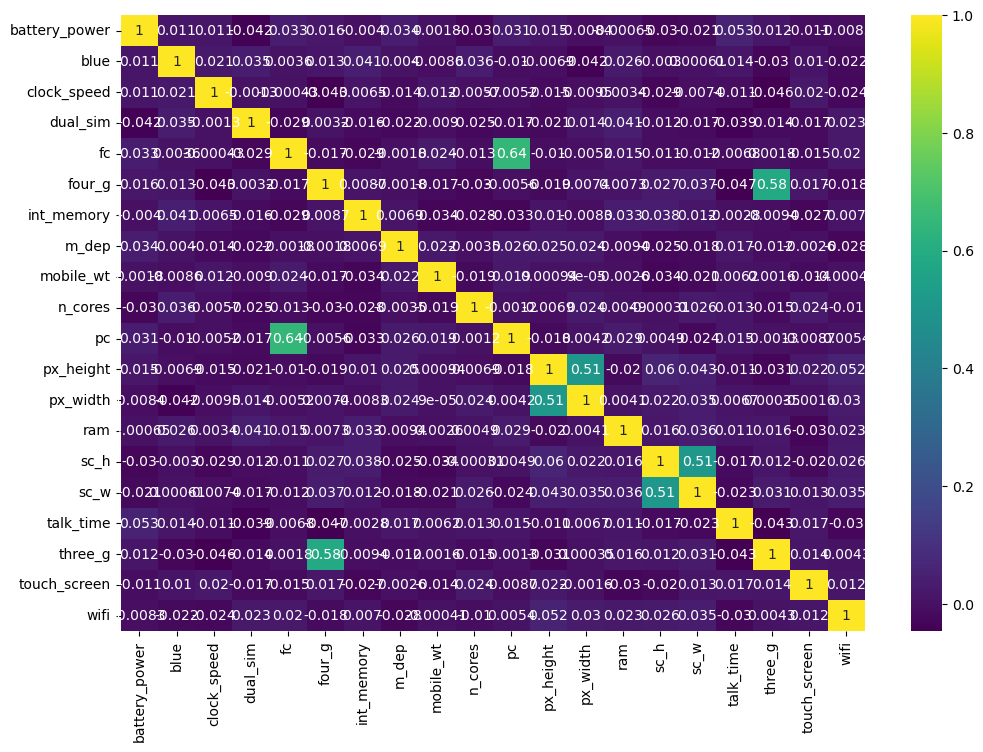

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()


In [2]:
import pandas as pd


# Specify the columns you want to one-hot encode
columns_to_encode = ['wifi', 'blue', 'dual_sim','three_g','touch_screen','four_g']  # Add your column names here

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

# Display the resulting DataFrame
print(df_encoded)


      battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  \
0               842          2.2   1           7    0.6        188        2   
1              1021          0.5   0          53    0.7        136        3   
2               563          0.5   2          41    0.9        145        5   
3               615          2.5   0          10    0.8        131        6   
4              1821          1.2  13          44    0.6        141        2   
...             ...          ...  ..         ...    ...        ...      ...   
1995            794          0.5   0           2    0.8        106        6   
1996           1965          2.6   0          39    0.2        187        4   
1997           1911          0.9   1          36    0.7        108        8   
1998           1512          0.9   4          46    0.1        145        5   
1999            510          2.0   5          45    0.9        168        6   

      pc  px_height  px_width  ...  blue_0  blue_1 

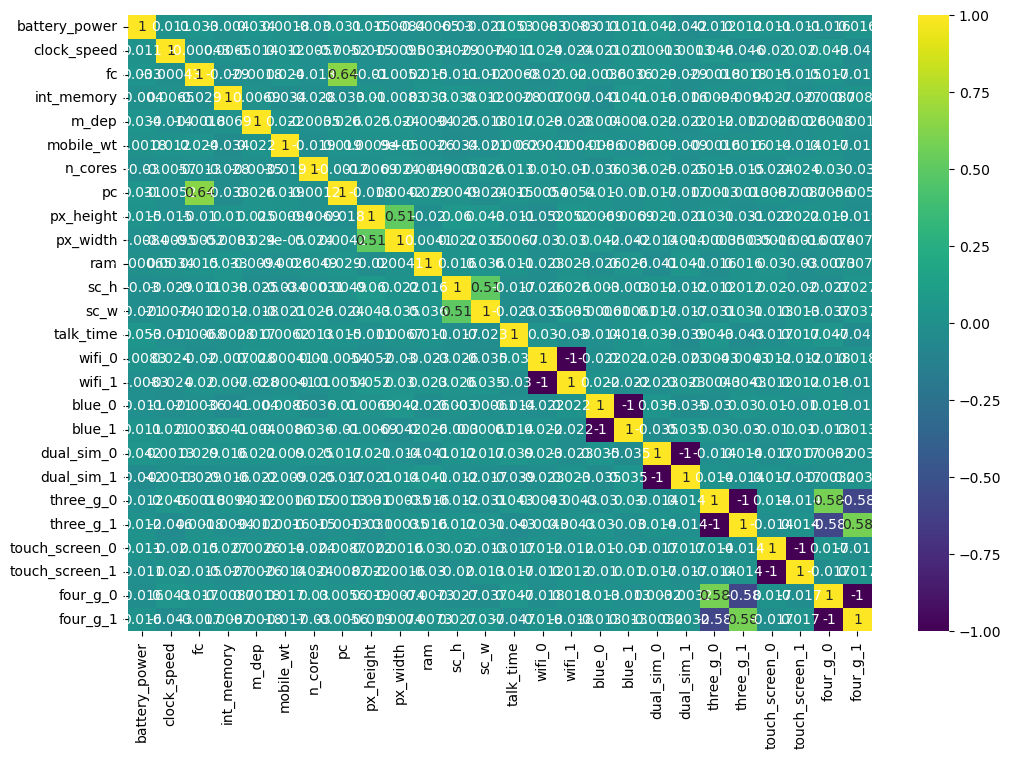

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='viridis')
plt.savefig('heatmap.png')
plt.show()


In [44]:
# data preprocessing

print(df.isnull().sum())

df.dropna(inplace=True)

df.fillna(df.mean(), inplace=True)


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


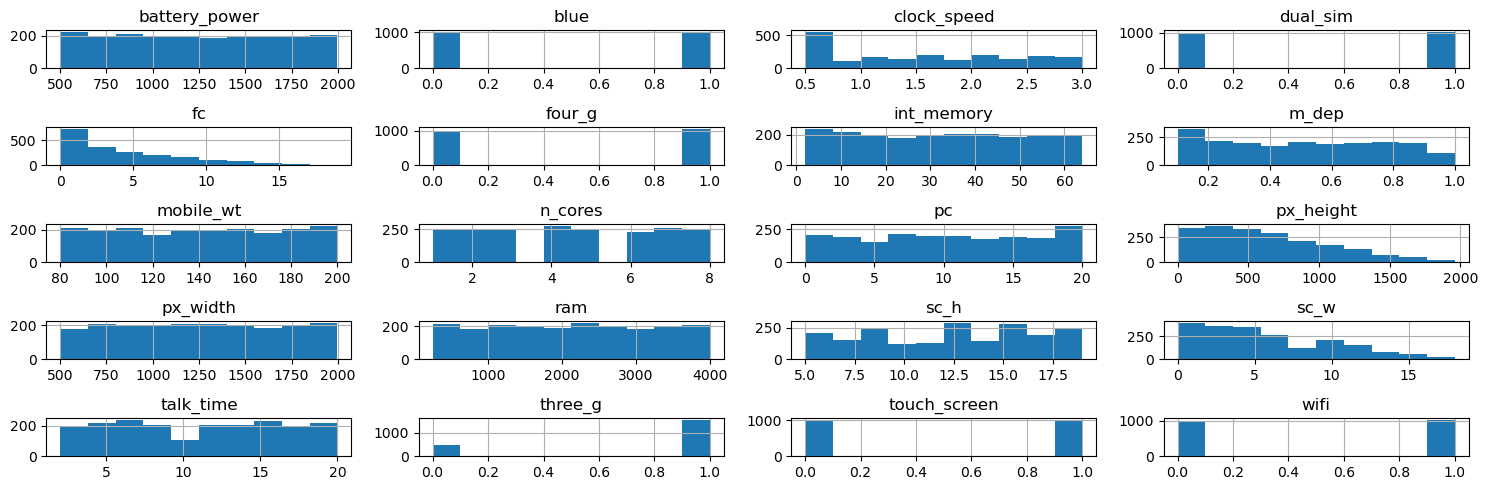

In [45]:
import matplotlib.pyplot as plt

df.hist(figsize=(15, 5))
plt.tight_layout()
plt.show()


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB


X = df  
y = dfl['price_range']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


classifiers = [
    ('Logistic Regression', LogisticRegression(multi_class="multinomial"), {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100], 'clf__penalty': ["l1", "l2", 'elasticnet'], 'clf__solver': ['newton-cg', 'lbfgs', 'liblinear']}),
    ('Random Forest', RandomForestClassifier(), {'clf__n_estimators': [10, 50, 100, 200],'clf__criterion': ['gini', 'entropy']}),
    ('Gradient Boosting', GradientBoostingClassifier(), {'clf__n_estimators': [50, 100, 200], 'clf__learning_rate': [0.01, 0.1, 0.2]}),
    ('K-Nearest Neighbors', KNeighborsClassifier(), {'clf__n_neighbors': [3, 5, 7]}),
    ('SVM', SVC(), {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf']})
]

for clf_name, clf, param_grid in classifiers:
    pipeline = Pipeline([
        ('clf', clf),
    ])

    grid = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=5)

    grid.fit(X_train, y_train)

    best_clf = grid.best_estimator_
    y_pred = best_clf.predict(X_test)

    print(f"\nResults for {clf_name}:\n")
    print('Best parameters:', grid.best_params_)
    print('Accuracy on the test set:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))

    pr = precision_score(y_test, y_pred, average='macro')
    print('Precision:\t', pr)

    rl = recall_score(y_test, y_pred, average='macro')
    print('Recall:\t', rl)

    fm = f1_score(y_test, y_pred, average='macro')
    print('F1-Score:\t', fm)


C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to co

C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to co

C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(



Results for Logistic Regression:

Best parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'}
Accuracy on the test set: 0.985
Confusion Matrix:
 [[102   3   0   0]
 [  0  91   0   0]
 [  0   2  90   0]
 [  0   0   1 111]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.95      1.00      0.97        91
           2       0.99      0.98      0.98        92
           3       1.00      0.99      1.00       112

    accuracy                           0.98       400
   macro avg       0.98      0.99      0.98       400
weighted avg       0.99      0.98      0.99       400

Precision:	 0.9842319139194139
Recall:	 0.9851902173913043
F1-Score:	 0.9844728827266718

Results for Random Forest:

Best parameters: {'clf__n_estimators': 200}
Accuracy on the test set: 0.88
Confusion Matrix:
 [[100   5   0   0]
 [  6  77   8   0]
 [  0   9  76   7]
 [  0   0  13  99]]
Clas

battery_power: 0.074796230364521
blue: 0.006594663895892335
clock_speed: 0.029057683684282205
dual_sim: 0.006429775987239565
fc: 0.024514290216123665
four_g: 0.00563382076910337
int_memory: 0.03792802351627729
m_dep: 0.024133673239735497
mobile_wt: 0.04143424706062984
n_cores: 0.023977908784910518
pc: 0.030744896361819443
px_height: 0.05853757592166689
px_width: 0.05672196633706496
ram: 0.4709622525121936
sc_h: 0.028447345008568527
sc_w: 0.028134314102686617
talk_time: 0.03244094786733417
three_g: 0.006840512880928487
touch_screen: 0.0063518969436614225
wifi: 0.006317974545360675


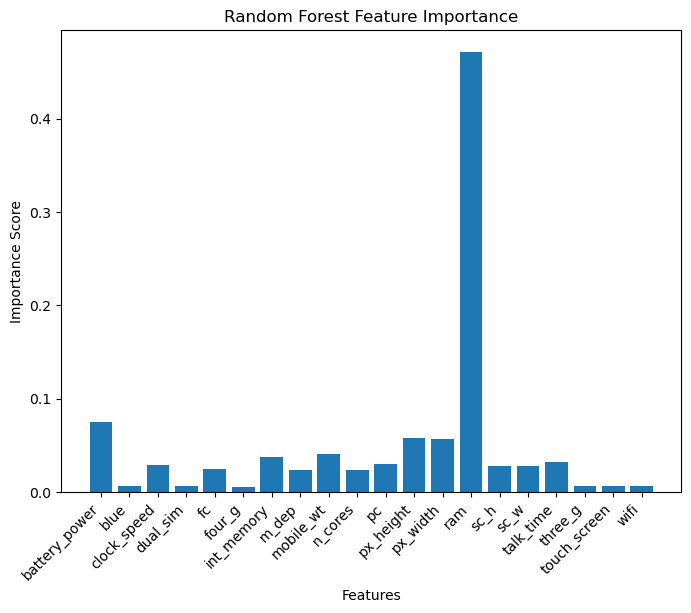

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df  
y = dfl['price_range']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

feature_importance_scores = rf_classifier.feature_importances_

for feature, importance in zip(X.columns, feature_importance_scores):
    print(f'{feature}: {importance}')

plt.figure(figsize=(8, 6))
plt.bar(X.columns, feature_importance_scores)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from collections import Counter

X = df 
y = dfl['price_range']


def get_class_statistics(labels):
    class_statistics = Counter(labels)
    print('\n Class \t\t Number of Instances \n')
    for item in list(class_statistics.keys()):
        print('\t' + str(item) + '\t\t\t' + str(class_statistics[item]))

def find_best_features(X_train, y_train, classifiers, max_features=20):
    best_score = 0
    best_k = 0
    best_classifier = None

    for clf_name, clf in classifiers:
        for k in range(1, max_features + 1):
            # Feature selection using chi2
            feature_selector = SelectKBest(chi2, k=k)
            X_selected = feature_selector.fit_transform(X_train, y_train)

            # Perform cross-validation
            scores = cross_val_score(clf, X_selected, y_train, cv=5, scoring='f1_macro')

            # Average cross-validation score
            avg_score = scores.mean()

            # Update the best score, best k, and best classifier if a higher score is found
            if avg_score > best_score:
                best_score = avg_score
                best_k = k
                best_classifier = clf_name

    # Feature selection using the best k
    best_feature_selector = SelectKBest(chi2, k=best_k)
    best_feature_selector.fit(X_train, y_train)
    best_features = X_train.columns[best_feature_selector.get_support()]

    return best_features, best_classifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print class statistics
get_class_statistics(y_train)

# Define classifiers and their names
classifiers = [
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('SVM', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB())
]

# Find the best features and best classifier based on cross-validation
best_features, best_classifier = find_best_features(X_train, y_train, classifiers)

# Print the results
print('Best Features:')
print(best_features)



 Class 		 Number of Instances 

	1			409
	2			408
	0			395
	3			388


C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Features:
Index(['battery_power', 'fc', 'int_memory', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
       'touch_screen'],
      dtype='object')


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB


X = df[['battery_power', 'fc', 'int_memory', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
       'touch_screen']] 
y = dfl['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


classifiers = [
    ('Logistic Regression', LogisticRegression(multi_class="multinomial"), {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100], 'clf__penalty': ["l1", "l2", 'elasticnet'], 'clf__solver': ['newton-cg', 'lbfgs', 'liblinear']}),
    ('Random Forest', RandomForestClassifier(), {'clf__n_estimators': [10, 50, 100, 200]}),
    ('Gradient Boosting', GradientBoostingClassifier(), {'clf__n_estimators': [50, 100, 200], 'clf__learning_rate': [0.01, 0.1, 0.2]}),
    ('K-Nearest Neighbors', KNeighborsClassifier(), {'clf__n_neighbors': [3, 5, 7]}),
    ('SVM', SVC(), {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf']})
]


for clf_name, clf, param_grid in classifiers:
    pipeline = Pipeline([
        ('clf', clf),
    ])
    grid = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=5)

    grid.fit(X_train, y_train)

    best_clf = grid.best_estimator_
    y_pred = best_clf.predict(X_test)

    print(f"\nResults for {clf_name}:\n")
    print('Best parameters:', grid.best_params_)
    print('Accuracy on the test set:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))

    pr = precision_score(y_test, y_pred, average='macro')
    print('Precision:\t', pr)

    rl = recall_score(y_test, y_pred, average='macro')
    print('Recall:\t', rl)

    fm = f1_score(y_test, y_pred, average='macro')
    print('F1-Score:\t', fm)


C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to co

C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to co

C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(



Results for Logistic Regression:

Best parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'}
Accuracy on the test set: 0.985
Confusion Matrix:
 [[102   3   0   0]
 [  0  91   0   0]
 [  0   2  90   0]
 [  0   0   1 111]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.95      1.00      0.97        91
           2       0.99      0.98      0.98        92
           3       1.00      0.99      1.00       112

    accuracy                           0.98       400
   macro avg       0.98      0.99      0.98       400
weighted avg       0.99      0.98      0.99       400

Precision:	 0.9842319139194139
Recall:	 0.9851902173913043
F1-Score:	 0.9844728827266718

Results for Random Forest:

Best parameters: {'clf__n_estimators': 100}
Accuracy on the test set: 0.895
Confusion Matrix:
 [[99  6  0  0]
 [ 4 82  5  0]
 [ 0  6 79  7]
 [ 0  0 14 98]]
Classification Repo

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from collections import Counter

X = df  
y = dfl['price_range']
def get_class_statistics(labels):
    class_statistics = Counter(labels)
    print('\n Class \t\t Number of Instances \n')
    for item in list(class_statistics.keys()):
        print('\t' + str(item) + '\t\t\t' + str(class_statistics[item]))

def find_best_features(X_train, y_train, max_features=20):
    best_score = 0
    best_k = 0

    for k in range(1, max_features + 1):
        # Feature selection using chi2
        feature_selector = SelectKBest(chi2, k=k)
        X_selected = feature_selector.fit_transform(X_train, y_train)

        # Use a classifier (e.g., RandomForestClassifier) and perform cross-validation
        clf = RandomForestClassifier()  # You can choose a different classifier
        scores = cross_val_score(clf, X_selected, y_train, cv=5, scoring='f1_macro')  # Use an appropriate scoring metric

        
        avg_score = scores.mean()

        if avg_score > best_score:
            best_score = avg_score
            best_k = k

 
    best_feature_selector = SelectKBest(chi2, k=best_k)
    best_feature_selector.fit(X_train, y_train)
    best_features = X_train.columns[best_feature_selector.get_support()]

    return best_features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

get_class_statistics(y_train)


best_features = find_best_features(X_train, y_train, max_features=20)

print('\nBest Features:')
print(best_features)



 Class 		 Number of Instances 

	1			409
	2			408
	0			395
	3			388

Best Features:
Index(['battery_power', 'int_memory', 'px_height', 'px_width', 'ram'], dtype='object')


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

X = df[['battery_power', 'int_memory', 'px_height', 'px_width', 'ram']]  # Selected features
y = dfl['price_range']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = [
    ('Logistic Regression', LogisticRegression(multi_class="multinomial"), {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100], 'clf__penalty': ["l1", "l2", 'elasticnet'], 'clf__solver': ['newton-cg', 'lbfgs', 'liblinear']}),
    ('Random Forest', RandomForestClassifier(), {'clf__n_estimators': [10, 50, 100, 200]}),
    ('Gradient Boosting', GradientBoostingClassifier(), {'clf__n_estimators': [50, 100, 200], 'clf__learning_rate': [0.01, 0.1, 0.2]}),
    ('K-Nearest Neighbors', KNeighborsClassifier(), {'clf__n_neighbors': [3, 5, 7]}),
    ('SVM', SVC(), {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf']})
]

# Iterate through each classifier
for clf_name, clf, param_grid in classifiers:
    pipeline = Pipeline([
        ('clf', clf),
    ])

    grid = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=5)

    grid.fit(X_train, y_train)

    best_clf = grid.best_estimator_
    y_pred = best_clf.predict(X_test)

    print(f"\nResults for {clf_name}:\n")
    print('Best parameters:', grid.best_params_)
    print('Accuracy on the test set:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))


    pr = precision_score(y_test, y_pred, average='macro')
    print('Precision:\t', pr)

    rl = recall_score(y_test, y_pred, average='macro')
    print('Recall:\t', rl)

    fm = f1_score(y_test, y_pred, average='macro')
    print('F1-Score:\t', fm)


C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to co

C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to co

C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(



Results for Logistic Regression:

Best parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'}
Accuracy on the test set: 0.985
Confusion Matrix:
 [[102   3   0   0]
 [  0  91   0   0]
 [  0   2  90   0]
 [  0   0   1 111]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.95      1.00      0.97        91
           2       0.99      0.98      0.98        92
           3       1.00      0.99      1.00       112

    accuracy                           0.98       400
   macro avg       0.98      0.99      0.98       400
weighted avg       0.99      0.98      0.99       400

Precision:	 0.9842319139194139
Recall:	 0.9851902173913043
F1-Score:	 0.9844728827266718

Results for Random Forest:

Best parameters: {'clf__n_estimators': 200}
Accuracy on the test set: 0.9025
Confusion Matrix:
 [[101   4   0   0]
 [  7  76   8   0]
 [  0   5  81   6]
 [  0   0   9 103]]
Cl

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline



X = df[['battery_power', 'int_memory', 'px_height', 'px_width', 'ram']]  # Selected features
y = dfl['price_range']




# Load the test dataset
test_df = pd.read_csv("C:\\Users\\ABHIS\\Downloads\\testdata.csv")


# Features for testing
X_test = test_df[['battery_power', 'int_memory', 'px_height', 'px_width', 'ram']]

# Logistic Regression with specified hyperparameters
logreg_params = {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}

logreg_model = LogisticRegression(**logreg_params)

# Fit the Logistic Regression model on the training data
logreg_model.fit(X, y)

# Predictions on the test data
y_pred_logreg = logreg_model.predict(X_test)

# Save predictions to a CSV file
with open("predictions.txt", "w") as file:
    for prediction in y_pred_logreg:
        file.write(str(prediction) + "\n")


C:\Users\ABHIS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
